Joe Freedman - A47774975

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import spatial
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Perceptron

In [145]:
data = pd.read_table("two_class.txt", sep=" ", \
                     names=["x1", "x2", "class"])
posclass_x1 = data[data["class"]== 1]["x1"]
posclass_x2 = data[data["class"]== 1]["x2"]
negclass_x1 = data[data["class"]== -1]["x1"]
negclass_x2 = data[data["class"]== -1]["x2"]

y = []
for i, row in data.iterrows():
    if row["class"] == 1:
        l = list(row[["x1", "x2"]])
        l.insert(0,1)
        y.append(np.array(l))
    else:
        l = list(row[["x1", "x2"]])
        l.insert(0,1)
        y.append(-1*np.array(l))

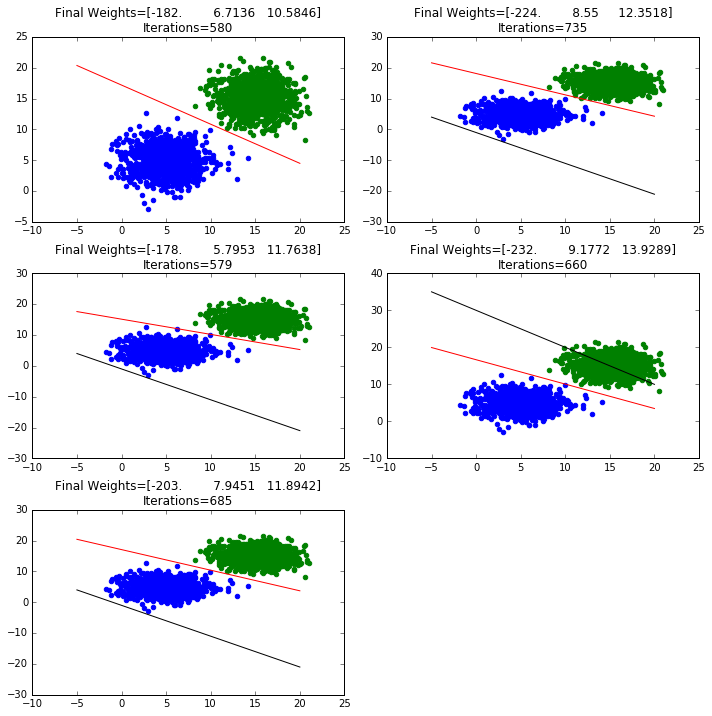

In [146]:
a_list = [np.array([0,0,0]) , np.array([1,1,1]), np.array([5,5,5]), \
          np.array([-30,1,1]), np.array([10,10,10])]
fig = plt.figure(figsize=(10, 10))
for i, a in enumerate(a_list):
    k = -1
    cnt = 0
    
    plt.subplot(3,2,i+1)
    plt.scatter(posclass_x1, posclass_x2, color='g')
    plt.scatter(negclass_x1, negclass_x2, color='b')
    x = np.linspace(-5,20, 500)
    y_plot1 = [(a[0]+a[1]*xi)/-a[2] for xi in x]
    plt.plot(x,y_plot1, color="k", label="Final Bnd")

    while True:
        k = k+1
        if k == data.shape[0]:
            #print("converge")
            break
        if cnt > 1000:
            #print("not converge")
            break
        if np.dot(a.T, y[k]) <= 0:
            a = a+y[k]
            k = -1
            cnt += 1

    #print(a, cnt)
    y_plot2 = [(a[0]+a[1]*xi)/-a[2] for xi in x]
    plt.plot(x,y_plot2, color="r", label="Final Bnd")
    plt.title("Final Weights={}\nIterations={}".format(a, cnt))
fig.tight_layout()

The black line is the inital boundary and the red line is the final boundary after the perceptron algorithm converges. There is no black line for the first plot because the [0,0,0] vector cannot be plotted.

# SBS and SFBS

## SBS

Input: $Y=\{y_1...y_d\}$

Output: $X_k=\{x_1...x_k\mid x_j\in Y\}$

Initilization: $x_d=Y; k=d$

Termination: Stop when $k$ equals the number of features desired.

Step 1: Exclusion Step

$x^- = \operatorname*{arg\,max}_{x\in X_k} J(X_k-x)$

$x_{k-1}=X_k-x^-$

$k = k-1$

go to Step 1

## SFBS

Input: $Y=\{y_1...y_d\}$

Output: $X_k=\{x_1...x_k\mid x_j\in Y\}$

Initilization: $x_d=Y; k=d$

Termination: Stop when $k$ equals the number of features desired.

Step 1: Exclusion Step

$x^- = \operatorname*{arg\,max}_{x\in X_k} J(X_k-x)$

$x_{k-1}=X_k-x^-$

$k = k-1$

Step 2: Conditonal Inclusion Step

$x^+ = \operatorname*{arg\,max}_{x\in Y-X_k} J(X_k+x)$

if $J(X_k+\{x^+\})>J(X_{k+1})$ then

$X_{k+1}=X_k+x^+$

$k = k+1$

go to Step 2

else go to Step 1

# Uniform Distribution
See attached work by hand.

# Iris Dataset KNN

In [147]:
data = pd.read_table("iris_data.txt", \
                     names=["sepal length", "sepal width", \
                            "petal length", "petal width", \
                            "class"], sep="\t")
class1_train, class1_test = data[data["class"] == 1].head(25), \
data[data["class"] == 1].tail(25)
class2_train, class2_test = data[data["class"] == 2].head(25), \
data[data["class"] == 2].tail(25)
class3_train, class3_test = data[data["class"] == 3].head(25), \
data[data["class"] == 3].tail(25)

train = pd.concat([class1_train, class2_train, class3_train])
test = pd.concat([class1_test, class2_test, class3_test])

ground_truth = [row[1][4] for row in test.iterrows()]
k_values = [1,5,9,13,17,21]
acc = []

for i,k in enumerate(k_values):
    print("k value: {}".format(k))
    predictions = []    

    for testrow in test.iterrows():
        k_nearest = []
        predict = None
        x1_test, x2_test, x3_test, x4_test = \
        testrow[1][0], testrow[1][1], testrow[1][2], testrow[1][3]
        for trainrow in train.iterrows():
            x1_train, x2_train, x3_train, x4_train = \
            trainrow[1][0], trainrow[1][1], trainrow[1][2],\
            trainrow[1][3]
            d = spatial.distance.euclidean\
            (np.array(trainrow[1][:-1]),np.array(testrow[1][:-1]))
            predict = trainrow[1][4]
            if len(k_nearest) < k:
                k_nearest.append((d,predict))
            else:
                if d < k_nearest[-1][0]:
                    k_nearest[-1] = (d, predict)
            k_nearest.sort()
        k_nearest_classes = [cls for dist,cls in k_nearest]
        predictions.append(np.bincount(k_nearest_classes).argmax())

    c11, c12, c13, c21, c22, c23, c31, c32, c33 = [0 for _ in range(9)]

    for g,p in zip(ground_truth, predictions):
        if g == 1:
            if p == 1:
                c11 += 1
            elif p == 2:
                c12 += 1
            elif p == 3:
                c13 += 1
        elif g == 2:
            if p == 1:
                c21 += 1
            elif p == 2:
                c22 += 1
            elif p == 3:
                c23 += 1
        elif g == 3:
            if p == 1:
                c31 += 1
            elif p == 2:
                c32 += 1
            elif p == 3:
                c33 += 1

    e = (c12+c13+c21+c23+c31+c32)/(c11+c22+c33+c12+c13+c21+c23+c31+c32)
    print("Error rate: {:.3f}".format(e))
    acc.append(1-e)

    confusion = np.array([[c11, c12, c13],[c21, c22, c23],[c31,c32,c33]])

    print("\nconfusion matrix =")
    print(confusion)
    print()

k value: 1
Error rate: 0.053

confusion matrix =
[[25  0  0]
 [ 0 24  1]
 [ 0  3 22]]

k value: 5
Error rate: 0.080

confusion matrix =
[[25  0  0]
 [ 0 23  2]
 [ 0  4 21]]

k value: 9
Error rate: 0.053

confusion matrix =
[[25  0  0]
 [ 0 24  1]
 [ 0  3 22]]

k value: 13
Error rate: 0.053

confusion matrix =
[[25  0  0]
 [ 0 24  1]
 [ 0  3 22]]

k value: 17
Error rate: 0.040

confusion matrix =
[[25  0  0]
 [ 0 25  0]
 [ 0  3 22]]

k value: 21
Error rate: 0.053

confusion matrix =
[[25  0  0]
 [ 0 25  0]
 [ 0  4 21]]



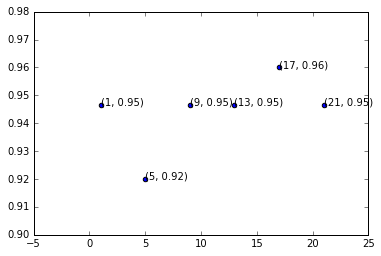

In [148]:
plt.scatter(k_values,acc)
for i, (k, a) in enumerate(zip(k_values, acc)):
    plt.annotate(str((k, round(a,2))), (k_values[i],acc[i]))

It seemed that increasing k would no doubt increase the accuracy of the KNN classifier, but that isn't always the case. With 1NN, the classifier does pretty well on the Iris Dataset with 95% accuracy. Increasing k to 5 actually caused a dip in performance that was not expected. It is possible that this dip in performance is due to randomly choosing due to ties which wouldn't happen in 1NN. I also found it interesting that k=1, 9, 13 and 21 all produced the same accuracy, but slightly different confusion matrices. All values of k classified setosa correctly indicating it was much more seperated than versicolor and virginic clases.

# 2D training data for a two-class problem
See attached work by hand.